In [ ]:
# Describe your data sources

In [ ]:
# Explain how we got the data, got it into python, issues when cleaning

In [ ]:
# EDA observations

In [ ]:
# EDA figures

In [ ]:
- explain shape files for geopandas
-we loooked at coordinates for making the maps for the census when trying to compare from listing datas so we couldnt prepare that
change to 2 coordiante reference system

In [ ]:
- calendar data has million rows, 365 times each listing

In [ ]:
-shape files, unique interaction with folders, use geopandas

In [ ]:
- price dist

In [ ]:
- census coordiante weirdness, calendar rows

In [ ]:
-careful with what we are mergin with what, how many master dataframes

In [ ]:
- 

# Status Report Analysis of Boston AirBnB Listings

#  Data Sources:
Most of our important data is collected from [Inside Airbnb](http://insideairbnb.com/get-the-data/):

These files include:
- "listings.csv.gz"
    - detailed listing data
- "reviews.csv.gz"
    - deatiled review data
- "calendar.csv.gz"
    - calendar data including listing availability, prices, and min/max nights (into near future)

Additionally, we collected 2020 census Boston neighborhood data: 
- 2020 Census neighborhood data
     - Shapefile for neighborhood outlines: [here](https://data.boston.gov/dataset/census-2020-block-group-neighborhoods/resource/ed89fab7-aa21-42ce-874b-1b4971ab50fb)
     -Neighborhood- level census statistics:[here](https://data.boston.gov/dataset/2020-census-for-boston/resource/5800a0a2-6acd-41a3-9fe0-1bf7b038750d)
- 2020 Census tract data
    - Shapefile for tract outlines: [here](https://data.boston.gov/dataset/census-2020-tracts)
    - Tract-level census statistics:  [here](https://data.boston.gov/dataset/2020-census-for-boston/resource/013aba13-5985-4067-bba4-a8d3ca9a34ac)






# Data Manipulation:

Most of our data manipulation occurred in: 9th_grade_geography_test.ipynb

- All of the dataset were saved in a folder called input
- Each dataset was created as a dataframe: 
    - reviews, calendar, listings, tract_data, neighborhood_data, boston_tract


- To create maps to determine where the tract listings are located , we had to use the geopandas function because shape files have a weird interaction with folders
- The shapely function allows us to plot longitude and latitude from the listings dataframe
    - As a result, we can add a column to boston_tract on whether a listing is in a trac tor not
    - We repeated the same process using shapely for neighborhood tract data

- We read in two older dataframes, listings_old and calendar_old, and performed a merge, which resulted in 2617 rows.
- We determined that the first data of 

# EDA Analysis and Observations

In [2]:
# !pip install geopandas
# !pip install mapclassify
import geopandas as gpd
import mapclassify
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [37]:
import seaborn as sns

# Calendar EDA

In [13]:
# load calander data
calendar = pd.read_csv('../inputs/calendar.csv.gz', compression='gzip')
calendar["date"] = pd.to_datetime(calendar["date"])

In [36]:
calendar.describe()
calendar
calendar['price'].value_counts().head(10)

$150.00    26458
$200.00    25360
$120.00    23656
$125.00    21794
$50.00     19117
$100.00    18969
$70.00     17821
$75.00     17445
$300.00    16012
$250.00    15786
Name: price, dtype: int64

In [29]:
calendar['price'].nunique()

2256

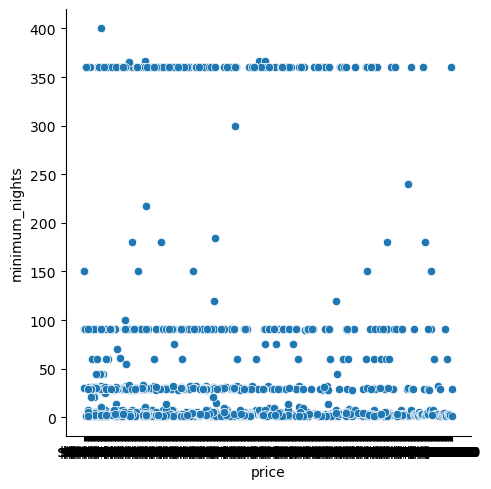

In [47]:
price_plot=sns.relplot(data=calendar.sample(2000), x='minimum_nights', y='price')

In [48]:
price_plot

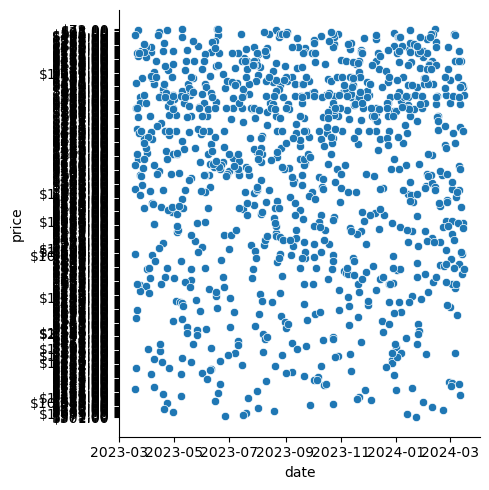

In [51]:
dateplot=sns.relplot(data=calendar.sample(1000), x='date', y='price')

In [32]:
calendar.head(30)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-03-19,f,$125.00,$125.00,32.0,1125.0
1,3781,2023-03-20,f,$125.00,$125.00,32.0,1125.0
2,3781,2023-03-21,f,$125.00,$125.00,32.0,1125.0
3,3781,2023-03-22,f,$125.00,$125.00,32.0,1125.0
4,3781,2023-03-23,f,$125.00,$125.00,32.0,1125.0
5,3781,2023-03-24,f,$150.00,$150.00,32.0,1125.0
6,3781,2023-03-25,f,$150.00,$150.00,32.0,1125.0
7,3781,2023-03-26,f,$125.00,$125.00,32.0,1125.0
8,3781,2023-03-27,f,$125.00,$125.00,32.0,1125.0
9,3781,2023-03-28,f,$125.00,$125.00,32.0,1125.0


# Calendar EDA Observations
- The calendar observation is that there is 1,410,023 values in the dataset.
    - This is because each listing is listed for each day of the year, so each listing was listed 365 times
    - The majority of prices fall between $75 - $300 and are multiples of 25 or 20
    - There is not a significant correaltion between the price of the AirBnB and the minimum nights or the date

# Listings EDA

In [ ]:
pd.set_option('display.max_columns', None)

In [52]:
listings = pd.read_csv('../inputs/listings.csv.gz', compression='gzip')

In [58]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.864000e+03,3.864000e+03,3.864000e+03,3864.000000,3864.000000,0.0,3864.000000,3864.000000,3864.000000,0.0,3404.000000,3784.000000,3864.000000,3864.000000,3863.000000,3863.000000,3.863000e+03,3.863000e+03,3863.000000,3.863000e+03,0.0,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,2741.000000,2733.000000,2734.000000,2732.000000,2734.000000,2732.000000,2732.000000,3864.000000,3864.000000,3864.000000,3864.00000,2741.000000
mean,2.426906e+17,2.023032e+13,1.489219e+08,479.007505,636.277174,NaN,42.337447,-71.082387,3.165890,NaN,1.745887,1.787791,30.833333,669.870083,34.353870,61.527828,2.224445e+06,7.227672e+06,59.673544,4.202859e+06,NaN,10.280797,24.861284,41.103002,199.546325,42.162526,11.995083,0.636128,4.683915,4.749162,4.722173,4.826753,4.804023,4.756863,4.599352,62.917702,40.223602,22.629400,0.01941,1.713707
std,3.417762e+17,2.578459e-01,1.411691e+08,1350.864251,1519.596073,NaN,0.027102,0.033245,2.190197,NaN,1.199617,1.414830,39.849525,452.893079,54.125029,102.214239,6.907623e+07,1.243836e+08,99.646681,8.451998e+07,NaN,10.915702,21.939576,32.173283,130.433047,83.892998,21.560316,1.509517,0.468679,0.388412,0.397928,0.358405,0.394559,0.351280,0.452757,111.174969,94.615752,70.529302,0.17738,1.944960
min,3.781000e+03,2.023032e+13,4.804000e+03,1.000000,1.000000,NaN,42.235300,-71.173486,0.000000,NaN,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,1.000000,2.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.010000
25%,2.531438e+07,2.023032e+13,2.234822e+07,2.000000,3.000000,NaN,42.321645,-71.100360,2.000000,NaN,1.000000,1.000000,2.000000,365.000000,1.000000,3.000000,3.650000e+02,3.650000e+02,2.200000,3.650000e+02,NaN,0.000000,0.000000,7.000000,78.750000,0.000000,0.000000,0.000000,4.600000,4.690000,4.630000,4.810000,4.800000,4.670000,4.500000,2.000000,1.000000,0.000000,0.00000,0.270000
50%,4.816150e+07,2.023032e+13,1.074344e+08,12.000000,17.000000,NaN,42.344725,-71.073305,2.000000,NaN,1.000000,1.000000,27.500000,365.000000,10.000000,29.000000,1.125000e+03,1.125000e+03,28.000000,1.125000e+03,NaN,7.000000,23.000000,41.000000,220.000000,7.000000,1.000000,0.000000,4.800000,4.860000,4.840000,4.940000,4.930000,4.870000,4.700000,8.000000,4.000000,0.000000,0.00000,1.020000
75%,6.419824e+17,2.023032e+13,2.758496e+08,84.000000,127.000000,NaN,42.354291,-71.060810,4.000000,NaN,2.000000,2.000000,32.000000,1125.000000,32.000000,91.000000,1.125000e+03,1.125000e+03,91.000000,1.125000e+03,NaN,19.000000,45.000000,70.000000,322.000000,44.250000,15.000000,1.000000,4.960000,4.980000,4.980000,5.000000,5.000000,5.000000,4.860000,50.000000,22.000000,4.000000,0.00000,2.470000
max,8.493358e+17,2.023032e+13,5.041795e+08,4807.000000,5358.000000,NaN,42.392280,-70.996000,16.000000,NaN,13.000000,22.000000,600.000000,1125.000000,600.000000,600.000000,2.147484e+09,2.147484e+09,600.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,821.000000,212.000000,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,340.000000,340.000000,274.000000,4.

In [ ]:
#Listing EDA Observations
- This dataframe is mostly used for the longitude and latitude of the AirBnB

In [18]:
# Load review data
reviews = pd.read_csv('../inputs/reviews.csv.gz', compression='gzip')
reviews["date"] = pd.to_datetime(reviews["date"])
reviews = reviews.drop('id', axis=1)

In [17]:
reviews

,listing_id,date,reviewer_id,reviewer_name,comments
0,3781,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
...,...,...,...,...,...
162911,730465117588795606,2022-12-21,144733920,Marcello,I really enjoyed my time here!
162912,730465117588795606,2023-01-01,325113163,Kasey,Perfect for a quick weekend trip to Boston. Gr...
162913,730478965019511672,2022-11-26,164074348,Zhengyanyan,Very nice and helpful host!!! Very nice stay e...
162914,730478965019511672,2023-01-03,181777865,William,"Great place….new, clean, modern, spacious, amp..."


The data on the reviews is largely, including just listing_id, reviewer_id, reviewer_name, date, and comments. This dataset does not have a major impact on our final analysis. 

,listing_id,date,reviewer_id,reviewer_name,comments
0,3781,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
...,...,...,...,...,...
162911,730465117588795606,2022-12-21,144733920,Marcello,I really enjoyed my time here!
162912,730465117588795606,2023-01-01,325113163,Kasey,Perfect for a quick weekend trip to Boston. Gr...
162913,730478965019511672,2022-11-26,164074348,Zhengyanyan,Very nice and helpful host!!! Very nice stay e...
162914,730478965019511672,2023-01-03,181777865,William,"Great place….new, clean, modern, spacious, amp..."
